> **DO NOT EDIT IF INSIDE `computational_analysis_of_big_data_2017` folder** 

# Week 3

*Thursday, September 7, 2017*

## Outline

Today we will be working through chapters 4, 5, 6 (and a little bit of 7). This is stuff that you're all probably familiar with to some extend, but since we are doing everything from scratch it is a good opportunity to sharpen our Python skills and refresh some important topics.

There will be some exercises for each chapter—some requiring careful thinking and others requiring you to code. You'll also be doing a bit of plotting but that should all be easy after last weeks exercises.

The exercises today cover:
* Linear algebra
* Statistics (very basic)
* Probability theory
* Hypothesis testing

## Material

*Data Science from Scratch* Chapter 4, 5, 6(, 7).
* *Chapter 4 - Linear algebra:* This is a short and super important chapter. Vectors and matrices are key to representing data and operating on it. It's not a very mathy chapter, just a short introduction on how to think of data as vectors and matrices.
* *Chapter 5 - Statistics:* In data science we constantly need to summarize data so we can make simple statements that more or less represent whatever complicated thing the underlying data is doing. This chapter introduces some useful tools from statistics that help us do this.
* *Chapter 6 - Probability:* Everything is somewhat random, especially data. Probability theory is, therefore—maybe unsurprisingly—the single most important prerequisite to understanding how something like Machine Learning works. This chapter is a bit heavier than the previous two, so we'll take only a few of the most important points with us.
* *Chapter 7 - Hypothesis and Inference:* This lies at the heart of the scientific method, which we must follow in order to say anything valid based on data. It's a bit too much to also ask you to read this one ahead of class, but we will cover it in the exercises because it relates to today's topic. Worry about this if you get this far today, otherwise just know that concepts like "p-value" and "null-hypothesis" are super important things that you will bump into sooner or later.

## Exercises

Throughout his book, Joel uses code instead of math to explain, well... math. While **you should challenge yourself to understand his snippets** (because they very simply explain difficult math), don't copy the code—you don't need it. Python the libraries like `numpy` and `scipy` which are excellent for computing various statistics, and you should learn how to use them. I went ahead and imported `numpy` for you, because you will need it in the exercises.

In [2]:
import numpy as np
from __future__ import print_function, division

### Part 1: Linear algebra (DSFS Chapter 4)

>**Ex. 3.1.1**: What does Joel mean when he uses the word *vector*?

A one-dimensional tensor, a list of numbers. 

>**Ex. 3.1.2**: Using `numpy`, compute:
1. `2 * [2, 3]`,
2. `[3, 8] + [6, 1]`,
3. `[3, 8] * [6, 1]` and
4. `[3, 8] · [6, 1]` (that's a dot product)?

In [16]:
a = []
a.append(np.multiply(2, [2, 3]))
a.append(np.add([3, 8], [6, 1]))
a.append(np.cross([3, 8], [6, 1]))
a.append(np.dot([3, 8], [6, 1]))
a

2


[array([4, 6]), array([9, 9]), array(-45), 26]

>**Ex. 3.1.3**: What does a dot product measure? How do you compute the length of a vector?

the product of their magnitudes by the cosine of the angle between them.  This happens because the angle between equal vectors is 0, cos(0) = 1, so 1 * the magnitude squared.

>**Ex. 3.1.4**: An $n \times k$ matrix has how many rows and columns? Construct a $5\times5$ matrix with `numpy`.

n rows and k columns

In [10]:
np.zeros(shape=(5,5))

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

>**Ex. 3.1.5**: Joel mentions three applications of matrices in Data Science. What are they?

For representing data sets consisting of multiple vectors, linear functions, and binary relationships.  

>**Ex. 3.1.6**: What are some reasons that the (adjacency) matrix representation of friendships may be better than the list representation from Chapter 1?

Memory efficiency if there are a large number of connections.  Quicker lookups for single and multiple connections, scalability. 

### Part 2: Statistics (DSFS Chapter 5)

>**Ex. 3.2.1**: Take a vector `a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]`:
1. Compute the mean of `a` using `numpy`.
2. How is median defined? Compute the median of `a` using `numpy`.
3. For `a`, why might it make sense to take the median more seriously than the mean?

In [3]:
a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]
print(np.mean(a))
print(np.median(a)) # the average of the 1 or 2 middle terms of the list

# the median is less susceptible to skew by outliers, and is therefore a more reliable representation of data.

1002.33333333
3.0


>**Ex. 3.2.2**: Using the same vector `a`:
1. How is *range* defined? Compute it.
2. How is *variance* defined? How does variance and standard deviation relate? Compute them.
3. What is the interquartile range? Compute it.

In [25]:
print(np.ptp(a)) # range is the largest number - the smallest number
print(np.var(a)) # avg = mean(a); mean([(x-avg)**2 for x in a])
print(np.subtract(*np.percentile(a, [75, 25]))) # get the number at the 75th percentile and the 25th percentile 
                                                # and subrtract them. 

8999
7995336.22222
4.0


>**Ex. 3.2.3**: Covariance and correlation are both measures of trend similarity.
1. How do they relate?
2. Compute the correlation between `a` and `b = [0, 4, 1, 6, 2, 0, 6, 0, 2]`.
3. How does that result change if you remove the last data-point from each list? Why? What word do we use for that last point?

Covariance is the relation between variables, and 
Correlation is the Covariance divided by the product of the variables' standard deviation

In [4]:
b = [0,4,1,6,2,0,6,0,2]
print(np.cov(a,b))
print(np.corrcoef(a,b))

[[  8.99475325e+06  -3.71125000e+02]
 [ -3.71125000e+02   6.00000000e+00]]
[[ 1.         -0.05051844]
 [-0.05051844  1.        ]]


>**Ex. 3.2.4**: Why does correlation NOT imply causation? What are ways of inferring causation?

Because it could be any number of hidden or confounding variables that is the actual causation.  Scientific experiments with controls and all that are required to infer causation.

### Part 3: Probability (DSFS Chapter 6)

>**Ex. 3.3.1**: What does it mean that the probabilities of two different events are dependent? Can you give an example of events whose probabilities of occuring depend on each other (name something that is not in the book)?

Two dependent events would be picking a card from a deck multiple times without replacing it.  Removing a card from the deck changes the probability for each card on the next pick.  

>**Ex. 3.3.2**: Joel gives an example in the book that illustrates the conditional probablity of “both children are girls” knowing “at least one of the children is a girl” versus the probability that "both children are girls" knowing "the older child is a girl". He computes these probabilities with the code below

In [4]:
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(both | older):", both_girls * 1.0 / older_girl )     # 0.514 ~ 1/2
print("P(both | either): ", both_girls * 1.0 / either_girl )  # 0.342 ~ 1/3

P(both | older): 0.514228456914
P(both | either):  0.341541328364


>Now imagine a family with three children. Assume the only genders are 'boy' and 'girl' and that their probability of occuring are equal and independent. Write a similar piece of code that computes:
1. the probability of three girls?
1. the probability of two girls and one boy?
1. the probability of one girl and two boys?
1. the probability of three boys?
1. the probability that all children are girls given that the oldest child is a girl?
1. the probability that all children are girls given that one of the children is a girl?

In [6]:
nTrials = 100000

all_girls = 0
more_girls = 0
more_boys = 0
all_boys = 0
any_girls = 0
oldest_girl = 0

for _ in range(nTrials):
    children = [random_kid() for _ in range(3)]
    if children[0] == "girl":
        oldest_girl += 1
    if "girl" in children:
        any_girls += 1
    else:
        all_boys += 1
    if "boy" not in children:
        all_girls += 1
    if children.count("boy") == 2:
        more_boys += 1
    if children.count("girl") == 2:
        more_girls += 1
        
print("P(all_girls):", all_girls / nTrials)
print("P(all_boys):", all_boys / nTrials)
print("P(more_girls):", more_girls / nTrials)
print("P(more_boys):", more_boys / nTrials)
print("P(all_girls | oldest_girl):", all_girls / oldest_girl)
print("P(all_girls | any_girl):", all_girls / any_girls)

P(all_girls): 0.12613
P(all_boys): 0.12411
P(more_girls): 0.37426
P(more_boys): 0.3755
P(all_girls | oldest_girl): 0.251786641115
P(all_girls | any_girl): 0.14400210072


>**Ex. 3.3.3**: Central limit theorem.

>The central limit theorem is fun because we can get Gaussian distributions from probability distributions that are _not_ Gaussian. Let's explore that in the following exercise.
* Use Python's `random` module to simulate rolling a fair six-sided die `1E7` times.
* Plot the distribution of dice rolls using a bar-chart. _Hint_: Use `Counter` (see p. 24) to bin the values, then go back to Chapter 3 for examples of how to plot bar-charts.
* Describe the shape of the distribution.
* Now perform a new simulation. Roll a fair six-sided die 10 times and take the _average_. Do that `1E6` times.
* Plot the distribution of those average values. This time you can't use `Counter` (since the averages are not integer values).
    - Instead use `numpy.histogram` to distribute those numbers into 25 bins. 
    - What does the `numpy.histogram` function return? Do the two arrays have the same length?
    - Then let's use `matplotlib.pyplot.bar` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
    
    
>* Describe the shape of _this_ distribution. Explain in your own words what happened to that flat distribution of die-rolls to suddenly make it Gaussian just by taking some averages.
* Calculate the mean and standard deviation of the averaged values. Could you have predicted these values by reading DSFS pp. 78-80?

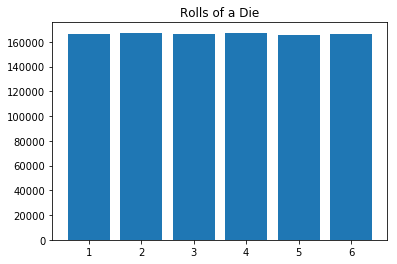

In [18]:
rolls = [random.randint(1,6) for _ in range(1000000)]

from collections import Counter
from matplotlib import pyplot as plt

c = Counter(rolls)
plt.bar(c.keys(), c.values())
plt.title("Rolls of a Die")
plt.show()

# very even distrobution, as one would expect from 1e7 random, independent events.

Mean: 3.500492
Std. Dev: 0.540292659524


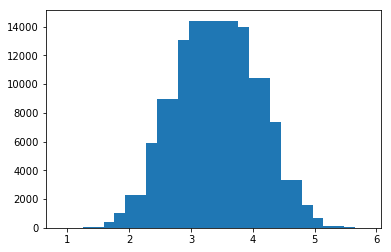

In [28]:
avgs = [np.mean([random.randint(1,6) for _ in range(10)]) for _ in range(100000)]
counts, bins = np.histogram(avgs, bins=25)

print("Mean:", np.mean(avgs))
print("Std. Dev:", np.std(avgs))

plt.bar(bins[:-1], counts)  # bins has an extra datapoint, for the right side of the last bin.  
                            # this is not needed for the pyplot bar chart.
plt.show()

This distrobution is Gaussian, because it is a distrobution of averages.  as the size of each instance increases, it becomes less likely that all N rolls were a six, leading to an average of 6.  It's much more likely that the rolls vary, leading to an average closer to the average of the values themselves. Yes the mean and Standard Deviation could have been calculated by looking at the original measures, and dividing the std deviation by the square root of 10.   

### Part 4: Hypothesis and inference  (DSFS Chapter 7)

There's a lot going on in Chapter 7, enough for an entire course really, and I didn't ask you to read this one ahead so the job is just to brush through and get a sense of what's going on. In particular, I recommend taking a close look at the cental example about testing the fairness of a coin. That example nicely captures the cental concepts.

Hypothesis testing and inference is, however, extremely important in any science that uses data (that's a tautology), so I have prepared a couple of questions to help you show that you've looked at the text and captured the gist.

>**Ex 3.4.1**: What's the null hypothesis when testing if a coin is fair?

Assuming that the coin is fair.

>**Ex 3.4.2**: Explain in your own words what Joel means by _significance_ on p. 83.

What probability is required to consider an event unlikely to have happened by chance.  Usually this is 5%, in other words, if the liklihood of this occurence happening by chance is < 5%, we can reject the null hypothesis.

>**Ex 3.4.3**: Explain in your own words what Joel means by _power_ on p. 83.

The ability of the test to successfully reject the null when it ought to be rejected.

>**Ex 3.4.4**: Write down a short definition of $p$-value.

The probability of an event occuring given the null hypothesis.

>**Ex 3.4.5**: Explain the problem with $p$-hacking.

By definition, with a significance of 0.05, an experiment will likely commit a type I error 5% of the time.  If we run the experiment 100 times, we can reject 5 times, even if the null hypothesis is truly the case.  This is why our alpha values must be set beforehand, and why we cannot cherry pick data.